# Day 1

## IO exercises

In [ ]:
#>U96639.2:5349-6893 Canis familiaris mitochondrion, cytochrome c oxidase subunit I
input = """ATGTTCATTAACCGATGACTGTTCTCCACTAATCACAAGGATATTGGTACTTTATACTTACTATTTGGAG
CATGAGCCGGTATAGTAGGCACTGCTTTGAGCCTCCTCATCCGAGCCGAACTAGGTCAGCCCGGTACTTT
ACTAGGTGACGATCAAATTTATAATGTCATCGTAACCGCCCATGCTTTCGTAATAATCTTCTTCATAGTC
ATGCCCATCATAATTGGGGGCTTTGGAAACTGACTAGTGCCGTTAATAATTGGTGCTCCGGACATGGCAT
TCCCCCGAATAAATAACATGAGCTTCTGACTCCTTCCTCCATCCTTTCTTCTACTATTAGCATCTTCTAT
GGTAGAAGCAGGTGCAGGAACGGGATGAACCGTATACCCCCCACTGGCTGGCAATCTGGCCCATGCAGGA
GCATCCGTTGACCTTACAATTTTCTCCTTACACTTAGCCGGAGTCTCTTCTATTTTAGGGGCAATTAATT
TCATCACTACTATTATCAACATAAAACCCCCTGCAATATCCCAGTATCAAACTCCCCTGTTTGTATGATC
AGTACTAATTACAGCAGTTCTACTCTTACTATCCCTGCCTGTACTGGCTGCTGGAATTACAATACTTTTA
ACAGACCGGAATCTTAATACAACATTTTTTGATCCCGCTGGAGGAGGAGACCCTATCCTATATCAACACC
TATTCTGATTCTTCGGACATCCTGAAGTTTACATTCTTATCCTGCCCGGATTCGGAATAATTTCTCACAT"""

geneSequence = input.replace("\n","")

In [ ]:
# Write your code here
geneLength = len(geneSequence)
geneGs = geneSequence.count("G")
geneCs = geneSequence.count("C")

GCperc = (geneGs + geneCs) / geneLength * 100

print("GC% is", str(round(GCperc,2)) + "%")


GC% is  0.43%


In [ ]:
# Write your code here

geneLength = len(geneSequence)
geneGs = geneSequence.count("G")
geneCs = geneSequence.count("C")

GCperc = (geneGs + geneCs) / geneLength

print(f"GC% is {round(GCperc, 2)}%")

GC% is 0.43%


In [ ]:
# Read in the data
with open("/content/CanisLupisCO1.txt", 'r') as inputFile:
  header = inputFile.readline()
  sequence = inputFile.read()

# Define the new header
outputName = "CanisLupis_" + str(len(sequence)) + "bp.fasta"


# Create and write to the output file
with open(outputName, 'w') as output:
  outputFile.write(header)
  outputFile.write(sequence)


## More Data type exercises

In [ ]:
gene_confs = [[0.92, 'MET1', 2205], [0.82, 'EGFR', 1567], [0.93, 'KRAS', 6523], [0.4, 'TP53', 5002], [0.94, 'ROS5', 1999], [0.87, 'BRCA1', 2323]]

gene_confs.sort()
print(gene_confs)

highest = gene_confs[-1][1]
print(highest)

gene_confs.append([0.97, "APC1", 4287])
gene_confs.append([0.72, "COI", 1660])

gene_confs.sort()
print(gene_confs)

low_conf_genes = gene_confs[0:3]
print(low_conf_genes)

low_conf_genes[0].append("RETEST")
low_conf_genes[1].append("RETEST")
low_conf_genes[2].append("RETEST")
print(low_conf_genes)

confs, geneIDs, len = zip(*gene_confs)

print(confs)

In [ ]:
# Dictionary exercises
bact = ["E. coli", "S. aureus", "P. aeruginosa", "K. pneumoniae", "A. baumannii"]
conf = [60, 80, 75, 90, 70]

# Create dictionary from two lists
bacteria_dict = dict(zip(bact, conf))
print(bacteria_dict)

# Print one element
print(bacteria_dict.get("K. pneumoniae"))

# Calculate Average
print(sum(bacteria_dict.values()) / len(bacteria_dict.values()))

## Build the motif dict

I have written you a function to search a region for repeated motif regions of different lengths. You don't need to understand the code right now, but you can use this function to *in silico* search the region to see if there are common repettitions.

```in_silico_motif_search(region, motif_length, threshold = 0)```

For example to search for motifs of 6 base pairs, and to return all options (no minimum threshold) we could do:
```in_silico_motif_search(region, 6)```

In [ ]:
def in_silico_motif_search(region, motif_length, threshold=0):
  motifs ={}
  index = 0
  passing_motifs = []

  # Go through the region X bp at a time and build a dictionary of unique motifs and abundance count
  while index < (len(region) - motif_length):
    motif = region[index:index + motif_length]
    if motif in motifs:
      motifs[motif] += 1
    else:
      motifs[motif] = 1

    index += 1

  # Build list of motifs that pass threshold
  for motif, val in motifs.items():
    if val >= threshold:
      passing_motifs.append((motif, val))

  passing_sorted_data = sorted(passing_motifs, key=lambda x: x[1])
  return passing_sorted_data

# A function to search for repeated motifs - DNA object, motif length, minimum threshold to return
all_5bp = in_silico_motif_search(region, 5, 4)

print(all_5bp)

NameError: ignored

## Day 1 Project - Motif learning

In [1]:
# Upstrem region of interest
region = "AATTATTTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTCAGCCTGGCACAGCAAGAATGAAATAATTTTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTCCTGCATAGTTGGTATTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTCCCTGGCACAGCAAGAATGAAATAATTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGGATGGAGTGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTCCTGCGTTGGTATTACTTAGCTAGGAGTGTGAGCCGGAGGGCGGGTTTTTTTTGAGACAAGGTCTTGCCCCGCCACCCAGGAGGGAGTGCGCTGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCGCGTGATCCCCCGGC"

# The list of binding motifs confirmed by your CHIPSeq experiment and first base binding in region
TFBS_experimental = ["AGGTC", "TGATT", "GTCTGA"]
confirmed_binding_sites = [139, 468, 321]

# Sequence motifs found in the region, and frequency
in_silico_sites = [('AATGA', 4), ('CATAG', 4), ('GGAGT', 5), ('GAGTG', 5), ('GGTCT', 5), ('TAGGT', 5), ('GGTCA', 5), ('GTGTG', 6), ('TGTGA', 6), ('TTGAG', 6), ('TCTTG', 6), ('GTGAT', 6), ('TGATC', 6), ('CTCAA', 6), ('AGGTC', 8), ('TTTTT', 14)]

# A dictionary of motifs and TF family
TF_library = {'AATGA': 'NF-κB', 'CATAG': 'NF-κB', 'GGAGT': 'AP-1', 'GAGTG': 'AP-1', 'GGTCT': 'AP-1', 'TAGGT': 'AP-1', 'GGTCA': 'AP-1', 'GTGTG': 'CREB', 'TGTGA': 'CREB', 'TTGAG': 'STAT3', 'TCTTG': 'STAT3', 'GTGAT': 'STAT3', 'TGATC': 'STAT3', 'CTCAA': 'STAT3', 'AGGTC': 'Sp1'}


Region is 520 base pairs long
Total AT% is 51.15 %
Part1 AT% is 56.07 %
Part2 AT% is 53.76 %
Part3 AT% is 43.68 %




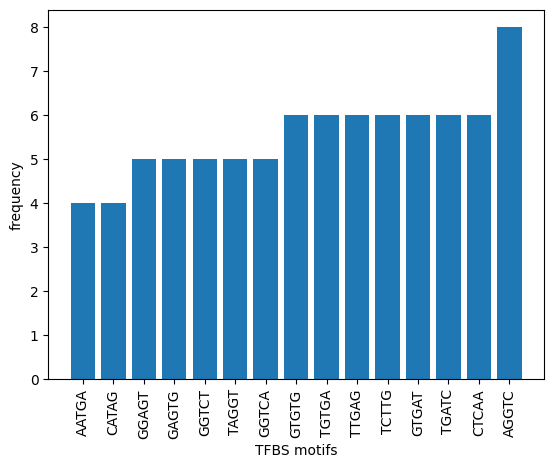


My TFBS motifs match to the following known families:
TFBS1 family is: Sp1
TFBS2 family is: None
TFBS3 family is: None
49

Binding regions
TFBS1
-----AGGTC-----
ATCATAGGTCACTGT

TFBS2
-----TGATT-----
TGGTGTGATCATAGG

TFBS3
-----GTCTGA-----
CAATGGTGTGATCATA


In [2]:
total_length = len(region)

total_AT_pc = (region.count("A") + region.count("T"))  / total_length * 100

region_part1 = region[:int(total_length/3)]
region_part2 = region[int(total_length/3):int(total_length/3) * 2]
region_part3 = region[int(total_length/3) * 2:]

part1_AT_pc = (region_part1.count("A") + region_part1.count("T"))  / len(region_part1) * 100
part2_AT_pc = (region_part2.count("A") + region_part2.count("T"))  / len(region_part2) * 100
part3_AT_pc = (region_part3.count("A") + region_part3.count("T"))  / len(region_part3) * 100


# Outputs
print("Region is", total_length, "base pairs long")
print("Total AT% is", round(total_AT_pc, 2), "%")

print("Part1 AT% is", round(part1_AT_pc, 2), "%")
print("Part2 AT% is", round(part2_AT_pc, 2), "%")
print("Part3 AT% is", round(part3_AT_pc, 2), "%")

print("\n")

in_silico_sites.pop()
# Graph
import matplotlib.pyplot as plt

x, y = zip(*in_silico_sites)

plt.bar(x, y)
plt.xlabel('TFBS motifs')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

## TF families from dict

print("\nMy TFBS motifs match to the following known families:")

print("TFBS1 family is:", TF_library.get(TFBS_experimental[0]))
print("TFBS2 family is:", TF_library.get(TFBS_experimental[1]))
print("TFBS3 family is:", TF_library.get(TFBS_experimental[2]))


print(region.find("AGGTC"))


## Motifs in region

print("\nBinding regions")

offset = 5

print("TFBS1")
index = confirmed_binding_sites[0]
print("-" * offset + TFBS_experimental[0] + "-" * offset)
print(region[(index - offset):(index + 5 + offset)])

print("\nTFBS2")
index = confirmed_binding_sites[1]
print("-" * offset + TFBS_experimental[1] + "-" * offset)
print(region[index - offset:index + 5 + offset])

print("\nTFBS3")
index = confirmed_binding_sites[2]
print("-" * offset + TFBS_experimental[2] + "-" * offset)
print(region[index - offset:index + 6 + offset])


# Day 2

## Looping

In [ ]:
# Species and counts per day (Mon/Tues/Weds/Thurs/Fri)
Monarch_count = [78, 70, 13, 17, 99]
Swallowtail_count = [6, 16, 44, 50, 44]
PaintedLady_count = [69, 27, 30, 74, 10]
Admiral_count = [66, 87, 74, 49, 65]
Peacock_count = [74, 78, 55, 70, 86]

all_butterflies_list = [Monarch_count, Swallowtail_count, PaintedLady_count, Admiral_count, Peacock_count]

for butterfly in all_butterflies_list:
  total = 0
  for day in butterfly:
      total += day

  print("total:", total)

## While and if

In [ ]:
trimmed_sequence = ""

index = 0
while index < len(sequence):
  if quality[index] > 20:
    trimmed_sequence += sequence[index]

  index += 1
# i = 0
# while quality[i] >= 20:
#     print(sequence[i])
#     i += 1
  

print(sequence)
print(trimmed_sequence)

import matplotlib.pyplot as plt

plt.plot(range(len(quality)), quality)
plt.axhline(20)
plt.show()

In [ ]:
# Data for your analysis
gene_list = ["TP53", "BRCA1", "EGFR", "KRAS", "MYC", "PTEN", "CDKN2A", "AKT1", "ERBB2", "RB1", "PIK3CA", "BRAF", "MET", "JAK2", "MAPK1", "NOTCH1", "FLT3", "KRAS", "EGFR", "PTEN", "TP53", "BRAF", "PIK3CA", "MYC", "ERBB2", "RB1", "AKT1", "CDKN2A", "MAPK1", "JAK2"]
gene_exp = [['TP53', -1.4245], ['BRCA1', 4.0941], ['EGFR', 1.8266], ['KRAS', -0.8996], ['MYC', -2.1188], ['PTEN', -1.8499], ['CDKN2A', 4.2798], ['AKT1', 0.4709], ['ERBB2', 2.144], ['RB1', 4.7541], ['PIK3CA', 2.6291], ['BRAF', 2.1514], ['MET', 0.2558], ['JAK2', 5.0332], ['MAPK1', 5.295], ['NOTCH1', 2.5695], ['FLT3', 5.3211], ['KRAS', 3.064], ['EGFR', 0.1768], ['PTEN', -0.4923], ['TP53', -4.7796], ['BRAF', -3.8257], ['PIK3CA', 0.3357], ['MYC', -0.0917], ['ERBB2', -3.2586], ['RB1', -0.7903], ['AKT1', 0.6729], ['CDKN2A', 5.8131], ['MAPK1', -4.9549], ['JAK2', -0.936]]
qPCR_status = {'TP53': False, 'BRCA1': False, 'EGFR': True, 'KRAS': False, 'MYC': True, 'PTEN': True, 'CDKN2A': False, 'AKT1': True, 'ERBB2': False, 'RB1': False, 'PIK3CA': True, 'BRAF': False, 'MET': False, 'JAK2': True, 'MAPK1': False, 'NOTCH1': False, 'FLT3': True}


## Exercise - Loops, lists and ifs

In [ ]:
# Loops and ifs exercise
for gene_pair in gene_exp:
  if gene_pair[1] > 0:
    up_genes.append(gene_pair)
  else:
    down_genes.append(gene_pair)

#print(up_genes)
#print(down_genes)

print("Upregulated genes")
print("Gene\tExpression\tValidated?")

for gene_pair in up_genes:
  status = qPCR_status.get(gene_pair[0])
  print(gene_pair[0], "\t", gene_pair[1], "\t", status)

print("\nDownregulated genes")
print("Gene\tExpression\tValidated?")

for gene_pair in down_genes:
  status = qPCR_status.get(gene_pair[0])
  print(gene_pair[0], "\t", gene_pair[1], "\t", status)

In [ ]:
up_genes = []
down_genes =[]

# Code goes here
# Loops and ifs exercise
for gene_pair in gene_exp:
  if gene_pair[1] > 2:
    up_genes.append(gene_pair)
  elif gene_pair[1] < -2:
    down_genes.append(gene_pair)

#print(up_genes)
#print(down_genes)
up_genes_count = len(up_genes)
up_genes_pc = up_genes_count / len(gene_list) *100

down_genes_count = len(down_genes)
down_genes_pc = down_genes_count / len(gene_list) *100

print(up_genes_count, "gt2 upregulated genes (" + str(up_genes_pc) + "%)")
print("Gene\tExpression\tValidated?")

for gene_pair in up_genes:
  status = qPCR_status.get(gene_pair[0])
  print(gene_pair[0], "\t", gene_pair[1], "\t", status)

print("\n" + str(down_genes_count), "lt2 downregulated genes (" + str(down_genes_pc) + "%)")
print("Gene\tExpression\tValidated?")

for gene_pair in down_genes:
  status = qPCR_status.get(gene_pair[0])
  print(gene_pair[0], "\t", gene_pair[1], "\t", status)

## Functions

In [ ]:
# Write your large_power function here:
def big_enough(sites, replicates):
  if sites * replicates >= 55:
    return True
  else:
    return False

# Testing your function
print(big_enough(20, 5))
# should print True

print(big_enough(5, 6))
# should print False

print(big_enough(11, 5))
# should print True

In [ ]:
# Your function
def complement(seq):
  complement = ""
  for base in seq:
    if base == "A":
      complement += "T"
    if base == "T":
      complement += "A"
    if base == "C":
      complement += "G"
    if base == "G":
      complement += "C"

  return complement
      

# Testing your function
for_seq = "ATGCGCATGCTAGCTAG"
comp_seq = complement(for_seq)

print("Forward sequence:\t", for_seq)
print("Complement sequence:\t", comp_seq)

## Advanced strings

In [5]:
new_list = [["data"]]
print(new_list)

[['data']]


In [ ]:
# Read file in as one block because too messy to read line by line
with open("/content/MessyData.txt") as inFile:
  data = inFile.read()

# Split samples by comma
bacteria = data.split(",")

# Make a new list and make sublists split by dash
bacteria_split =[]

for each in bacteria:
  bacteria_split.append(each.split("-"))

# Make a new list and remove whitespace
transactions_clean = []

for each in bacteria_split:
  # Note how we create the sublist for each loop
  sublist = []
  for each in each:
    sublist.append(each.strip())
  
  transactions_clean.append(sublist)

# Lets make new lists for each data type    
collector = []
percentage_abun = []
dom_phyla = []

for each in transactions_clean:
  collector.append(each[0])
  percentage_abun.append(each[1])
  dom_phyla.append(each[2])

# Because some samples have multiple dominant phyla we need to split and add them seperately
dom_phyla_split = []

for each in dom_phyla:
  if "&" in each:
    dom_phyla_split += each.split("&")
  else:
    dom_phyla_split.append(each)

# Get a list of the unique phyla - set automatically removes duplicates
phyla = list(set(dom_phyla_split))

# Loop through and print it out
for p in phyla:
  print("There are {} samples dominant in {}".format(dom_phyla_split.count(p), p))


There are 34 samples dominant in Bacillus
There are 24 samples dominant in Firmicutes
There are 22 samples dominant in Acidobacteria
There are 30 samples dominant in Proteobacteria
There are 26 samples dominant in Cyanobacteria
There are 17 samples dominant in Actinomycetes
There are 28 samples dominant in Chloroflexi


## Project - Chip Binding

In [ ]:
## Dan's generate the data code
import numpy as np
import matplotlib.pyplot as plt

def generate_data(midpoint=0, width=0.05):
    """
    Generate simulated data with a continuous variable and an abundance peak.
    """
    np.random.seed(42)

    # Generate x values (continuous variable)
    x = np.linspace(-10, 10, 100)

    # Generate y values (abundance values with a peak)
    y = np.exp(-(x + midpoint) ** 2 / 2) + np.random.normal(0, width, len(x))

    return list(x), list(y)


sample_dictionary = {}

sample_dictionary["WT01"] = (generate_data(1,0.05))
sample_dictionary["WT02"] = (generate_data(-0.5,0.03))
sample_dictionary["WT03"] = (generate_data(0.8,0.08))

sample_dictionary["KO01"] = (generate_data(-4,0.35))
sample_dictionary["KO02"] = (generate_data(-0.5,0.23))
sample_dictionary["KO03"] = (generate_data(-6,0.15))

print(sample_dictionary["KO03"])


# with open("binding_data.sgr", "w") as outwrite:
#   for id, coords in sample_dictionary.items():
#     i = 0
#     while i < len(coords[0]):
#       outwrite.write(id + "\t" + str(coords[0][i]) + "\t" + str(coords[1][i]) + "\n")
#       i += 1

([-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033

In [ ]:
## Reading in the binding data file
data_dict = {}

# read the file and crate a dictionary using column 1 as the key and x,y as the values
with open("binding_data.sgr") as infile:
  for line in infile:
    sample, x_coords, y_coords = line.strip().split()

    if sample in data_dict:
       data_dict[sample].append([x_coords, y_coords])
    else:
       data_dict[sample] = [[x_coords, y_coords]]

  
## For each sample id in the dictionary create an X and Y list and output into a new dictionary
new_dict  = {}

for sample, coords in data_dict.items():
  x_list = []
  y_list = []
  for vals in coords:
    x_list.append(float(vals[0]))
    y_list.append(float(vals[1]))

  new_dict[sample] = x_list, y_list
  

In [ ]:
with open("/content/Day2-Project-region.fasta") as region:
    for line in region.readlines():
      if not line.startswith('>'):
        region_sequence = line

def analyze_data(x, y):
    """
    Analyze the data and plot the results.
    """
    # Find the index of the maximum abundance value
    max_index = np.argmax(y)

    # Get the maximum abundance value and its corresponding x value
    max_abundance = y[max_index]
    max_x = x[max_index]

    # Calculate the average abundance of the data
    average_abundance = np.mean(y)

    # Plot the data
    plt.plot(x, y, label='Abundance')
    plt.axvline(max_x, color='red', linestyle='--', label='Peak Location')
    plt.xlabel('X')
    plt.ylabel('Abundance')
    plt.title('Abundance Distribution')
    plt.legend()
    plt.show()

    # Print the analysis results
    print("Maximum Abundance:", max_abundance)
    print("Peak Location (X value):", max_x)
    print("Average Abundance:", average_abundance)


def get_peak_sequence(seq, mid, size=30):
  midpoint = mid * 10
  up_downstream = int(size / 2)
  return seq[(midpoint - up_downstream):(midpoint + up_downstream)]

x, y = new_dict["WT01"]

print(region_sequence)

print(get_peak_sequence(region_sequence, peak_index, 20))

  # Find the peak
  peak_xcoords, peak_index =  find_peak(x_coords,y_abun)

  # plot the graphs
  plot_abun(id, x_coords,y_abun, peak_xcoords)

  # extract sequence around peak
  region_size = 30
  print("30bp region around peak is:", get_peak_sequence(region_sequence, peak_index, region_size))
  print("----------")

# Day 3

## Biopython SeqIO

In [ ]:
!pip install BioPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.2 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO, Seq

aa_list = []
aa_dict = {}

for seq_record in SeqIO.parse("/content/co1_sequences.fasta", "fasta"):
    new_aa = seq_record.seq.translate(table=2)
    
    # add to list
    aa_list.append(new_aa)

    # add to dictionary
    aa_dict[seq_record.id] = new_aa

print("My list output")

for each in aa_list:
  print(each)

print("\nMy dictionary output")

for id, aa in aa_dict.items():
  print(">" + id)
  print(aa)


## Biopython filtering embl/gb

In [ ]:
gene_seq_dict = {}

for feature in first_record.features:
  if feature.type == "CDS":
    gene_id = feature.qualifiers['gene'][0]
    start = feature.location.start
    end = feature.location.end

    CDS = first_record.seq[start:end]
    gene_seq_dict[gene_id]  = CDS


for key, value in gene_seq_dict.items():
  print(">" + key)
  print(value)

In [ ]:
from Bio import SeqIO

# Read the data in
record_iter = SeqIO.parse("/content/am181037.embl", "embl")
first_record = next(record_iter)

gene_seq_dict = {}

for feature in first_record.features:
    # These are built in keywords for the objects
    start = feature.location.start
    end = feature.location.end

    #print(start, ":",  end)
    # Populate the dictionary here
    if feature.type == 'CDS':
        gene_id = feature.qualifiers['gene'][0]
        CDS = first_record.seq[start:end]
        print(gene_id, "\t", CDS)

In [ ]:
def normalise_array(y):
    # Calculate the norm of the array
    norm = np.linalg.norm(y)

    # Normalize the array
    normalized_arr = y / norm

    return normalized_arr


# WT averaging
y1, y2, y3 = y_abun_WT01, y_abun_WT02, y_abun_WT03
WT_mean_values = np.mean([normalise_array(y1), normalise_array(y2), normalise_array(y3)], axis=0)

# KO averaging
y1, y2, y3 = y_abun_KO01, y_abun_KO02, y_abun_KO03
KO_mean_values = np.mean([normalise_array(y1), normalise_array(y2), normalise_array(y3)], axis=0)

plt.plot(x_coords,WT_mean_values)
plt.plot(x_coords,KO_mean_values)
plt.show()

## argparse

In [ ]:
#!/usr/bin/python3

import argparse
from Bio import SeqIO, Seq


# Initialise the parser class
parser = argparse.ArgumentParser(description='Description of your script')

# Define some options/arguments/parameters
parser.add_argument('-i', '--input', help='Path to input file')
parser.add_argument('-o', '--output', help='Path to output file', default='my_output.txt')
parser.add_argument('-m', '--min_length', help='minimum length required', default='900')

# Collect the inputted arguments into a dictionary
args = parser.parse_args()


for seq_record in SeqIO.parse(args.input, 'fasta'):
    seq_len = len(seq_record)
    GC = (seq_record.seq.count("G") + seq_record.seq.count("C")) / seq_len * 100

    if seq_len > int(args.min_length):
        print("Sequence", seq_record.id, "has length", seq_len, "and GC of", str(round(GC, 2)) + "%")

## Project - Covid

In [2]:
!pip install Biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.3 MB/s eta 0:00:00


In [30]:
# Read in the fasta file as a biopython object
from Bio import SeqIO, Seq
import pandas as pd

def GC_pc(seq_record):
    sequence = seq_record.seq
    GC_pc = (sequence.count("G") + sequence.count("C")) / len(sequence) *100
    return round(GC_pc,2)

def number_of_gaps(seq_record, min_size):
    sequence = seq_record.seq
    N_sizes = []
    counter = 0
    for base in sequence:
        if base == "N":
            counter += 1
        else:
            if counter > min_size:
                N_sizes.append(counter)
            counter = 0

    return len(N_sizes)


# Read in the fasta file as a biopython object
strain_sequences = []
for seq_record in SeqIO.parse("Day3-Project-nextclade.fasta", "fasta"):
  strain_sequences.append(seq_record)

# Read in the metadata file as a dataframe
metadata = pd.read_csv("Day3-Project-nextclade_metadata.csv", ';')

#print(metadata)


findings = {}
for record in strain_sequences:
    #print(record.id)
    findings[record.id] = [GC_pc(record), number_of_gaps(record, 3)]
    #print(f"{record.id} \t {GC_pc(record)}% \t {number_of_gaps(record, 3)}")


print(findings.get('ON544567'))



import matplotlib.pyplot as plt


<ipython-input-30-7bbc329e4824>:31: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  metadata = pd.read_csv("Day3-Project-nextclade_metadata.csv", ';')


[37.63, 5]


In [19]:
import re

class Sequence:
    def __init__(self, ID, raw):
        self.id = ID
        self.raw = raw
        self.length = len(raw)

    def __repr__(self):
        return "The sequence object for {} (length: {})".format(self.id, self.length)

    def calc_GC(self):
        gc_perc = (self.raw.count("G") + self.raw.count("C")) / self.length * 100
        return str(round(gc_perc, 2)) + "%"

    def translateRNA(self):
        tr = self.raw.replace("T", "U")
        return tr
    
    def motif_search(self, motif):
        motif_count = self.raw.count(motif)

        if motif_count != 0:
            return "Motif {} found in {} {} times".format(motif, self.id, motif_count)
        else:
            return "Motif {} was not found in {}".format(motif, self.id)

## Some tests here

my_first_sequence = Sequence("HSA01", "TGTGTCATGCAAAACTAGGTCATGCGTCCGCTGACTGATGACTGACACTGGTGGCACAACTGACTGAC")
my_second_sequence = Sequence("MET01", "AAAAAAACGCGACTACGCGGCGACTATGTGTCATGCAAAACTAGGTCATGCGTCCGCTTGTGTGTGCAACGATGCGACTA")

print(my_first_sequence)
print(my_second_sequence)

print(my_first_sequence.calc_GC())
print(my_second_sequence.calc_GC())

print(my_first_sequence.translateRNA())
print(my_second_sequence.translateRNA())


print(my_first_sequence.motif_search("TGACTG"))
print(my_second_sequence.motif_search("TGACTG"))


The sequence object for HSA01 (length: 68)
The sequence object for MET01 (length: 80)
51.47%
50.0%
UGUGUCAUGCAAAACUAGGUCAUGCGUCCGCUGACUGAUGACUGACACUGGUGGCACAACUGACUGAC
AAAAAAACGCGACUACGCGGCGACUAUGUGUCAUGCAAAACUAGGUCAUGCGUCCGCUUGUGUGUGCAACGAUGCGACUA
31
Motif TGACTG found in HSA01 3 times
Motif TGACTG was not found in MET01
